# Minor Project Exam: Exploratory Data Analysis (EDA)

### Problem statement:
Perform exploratory data analysis (EDA) on the given dataset using Python libraries such as Numpy, Pandas, and Matplotlib/Seaborn. The goal is to uncover underlying patterns, relationships, and insights from the data.

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               # Importing of needed python libraries and functions.
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

### Section 1: Understanding the Dataset

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [ ]:
df=pd.read_csv('car_price_dataset.csv')   # pd.read_csv() - pandas function to read a CSV file and create a DataFrame from it.
df                                                               # Confirm DataFrame and observe data.

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

Conclusion and Observations: The dataset is of the structured type (tabular) and has 15411 rows (entries) with 14 features containing various data types. The display of the first few rows shows us the different column andtheir names to give us an idea of the data set, and the last few rows shows us how many rows there are total (.shape() also shows us number of (row, columns).

### Section 2: Initial Data Examination

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

It can be seen that from df.info() that there are totalof 14 columns (1st column is an index column), and each column has zero null/missing values, and there are data types of integer, float (decimal) and object.
Iterated through the columns to find the number of unique values within each column.
Data types and number of unique values determine the feature engineering of data (example for scaling and encoding).

Conclusion and Observations: Theres a total of 15411 rows and 14 columns, containing 3 data types (int64, object and float64), and each column has 15411 non-null values, which means that there is 15411 values in each column which means there is no null (absent) values since there is 15411 rows.

#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [ ]:
print('Original data types')
print(df.dtypes)                                                            # printing the data types of eaach column.
df['car_name']= df['car_name'].astype('category')                           # permanently changing the data type of column.
df['brand']=df['brand'].astype('category')                                  # permanently changing the data type of column.
df['model']=df['model'].astype('category')                                  # permanently changing the data type of column.
df['seller_type']=df['seller_type'].astype('category')                      # permanently changing the data type of column.
df['fuel_type']=df['fuel_type'].astype('category')                          # permanently changing the data type of column.
df['transmission_type']=df['transmission_type'].astype('category')          # permanently changing the data type of column.
print('')                                                                   # line space
print(df.dtypes)                                                            # printing the new data types of each column.

Original data types
Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

Unnamed: 0              int64
car_name             category
brand                category
model                category
vehicle_age             int64
km_driven               int64
seller_type          category
fuel_type            category
transmission_type    category
mileage               float64
engine                  int64
max_power             float64
seats                   int64
selling_price           int64
dtype: object


Data types were of integer, float and object.
The integer and float columns are correct and data does correspond to data types.
The data types of object are actually all categorical (nominal) data, and was converted to such, so that they can be encoded in the latter part, also so that it does not negatively impact our analysis.


Rationale behind conversion: The columns, "car_name, brand,model, seller_type, fuel_type and transmission_type are of the object data type and they all have nominal categorical data (non-numeric and no ranking), therefore they should be converted to categorical data types, also for the reason of encoding of the catergorical data

#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

.describe() returns a statistical summary of each row, including the number of data entries, the mean, standard deviation, min, max values, also the 25%, 50% (median) and 75% percentile of the data.
From this data outliers can be calculated as well as other figures needed.

#### 2.4 Provide detailed comments that explain your understanding of the data.

   
*   So far from initial analysis, the dataset is tabular, with 15411 rows and 14 columns, the first column is an index column.  


*   There were no null/missing values present within columns.


*   There are 4 columns with < 10 uniques values (3, 5, 2, 8) and one with 32, this information is important for future transformation steps.


*   There are integer, floats and object data types, numerical columns correspond to data types, but object columns are categorical and nominal and was therefore changed to category data types for future transformations.

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.


**Visual representation of outliers based on box plot**



*   **Calcuation of lower and upper limit range of vehicle_age.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of veicle_age column (outliers).**




*   **Calcuation of lower and upper limit range of km_driven.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of km_driven column (outliers).**



*   **Calcuation of lower and upper limit range of mileage column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of mileage column (outliers).**


*   **Calcuation of lower and upper limit range of engine column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of engine column (outliers).**


*   **Calcuation of lower and upper limit range of max_power column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of max_power column (outliers).**


*   **Calcuation of lower and upper limit range of seats column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of seats column (outliers).**


*   **Calcuation of lower and upper limit range of selling_price column.**

*   **Tabular representation of all rows correspnding to less than the lower limit and greater than the upper limit of selling_price column (outliers).**

#### 3.4 Add python comments to explain the observations.

In [ ]:
# As seen from df.isna(.sum() - the output showed that their are no missing or NaN values as each coloumn has zero missing or NaN values within the dataset.
# As seend from df.duplicated() - the output showed that there are zero duplicated rowswithin the dataset

# The outliers of each 7 numeric columns shall not be removed or imputated since each column will effect the selling price because they are
# apart of the data and most likely not mistakes or incorrectly entered data, for example,
# The vehicle age outliers cannot be removed because it could be the case that a vehicle could be very old
# (vintage or even just in high demand within groups of people), and therefore have a greater selling price.

# The km_driven outliers cannot be removed because it could be the case that a vehicle could have a large km_driven or
# vintage or even just in high demand within groups of people), and therefore have a greater selling price, or could have a high km_driven and have
# a low selling price due to wear and tear on the vehicle.

# The mileage outliers cannot be removed because it could be the case that a vehicle could have a high mileage (better fuel consumption)
# but that depends on the fuel type, because from data set its seen that vehicles of fuel_type CNG has a much better fuel consumption than
# other fuel_types, and therefore could mean that selling price is higher for that or maybe the technology is cheaper cost and could be lower
# selling price for better fuel consumption.

# The engine (size) outliers cannot be removed because it could be the case that a vehicle could have a larger engine size and
# therefore a higher selling price (example- V8 and v12 engines will cost much more than a normal 2L engine).
# can also be seen visually that there are a great number of outliers for engine and selling_price abov the upper limit

# The max_power outliers cannot be removed because it could be the case that a vehicle could have a vehicle with a larger amount
# of power and therefore a higher selling price, since generally faster cars cost more due to larger engine size or technologies that make it faster
# from a smaller engine.
# can also be seen visually that there are a great number of outliers for max_power and selling_price above the upper limit

# The seats outliers cannot be removed because it could be the case that a vehicle could vary in size and therefore can have seats lower or above the
# lower and upper limits, it can be seen visually that most outliers would correspond to a motorbike, van with 2 seats (2x2), and 6 seats is an
# outlier whihc would correspond to a huge amount of vehicles (specifically SUV's, 4x4's).

# Outliers, when need to be removed, can be removed by condition with the UL and LL, or they can be imputed with the mean/median value,
# or value < LL will be filled with LL value, and values > UL will be filled with UL values.



### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

4.1) Since histograms is good for representing continuous numerical data, the features containing numeric data was chosen,, and its seen that mileage is the only feature with a symetric distribution, with max_power, vehicle_age, km_driven, selling_price and engine having positively skewed data, meaning that there mode and median value is less than their mean value.

#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [ ]:
df2 = df.copy()     # Creating an independent copy of dafatframe (df). Going to use df for transformation.

In [ ]:
df.skew(numeric_only=True)   # Investigating initial skewness of data set.

,0
Unnamed: 0,-0.014554
vehicle_age,0.833712
km_driven,28.172711
mileage,0.104961
engine,1.666467
max_power,2.485129
seats,2.039983
selling_price,10.047048


In [ ]:
vehicle_age_log = np.log(df['vehicle_age'] + 1)              # Performing log functions on all numeric data, except for mileage, since its distribution is close to 0 (0.1)
df['vehicle_age'] = vehicle_age_log

km_driven_log = np.log(df['km_driven'] + 1)
df['km_driven'] = km_driven_log

engine_log = np.log(df['engine'] + 1)
df['engine'] = engine_log

max_power_log = np.log(df['max_power'] + 1)
df['max_power'] = max_power_log

seats_log = np.log(df['seats'] + 1)
df['seats'] = seats_log

selling_price_log = np.log(df['selling_price'] + 1)
df['selling_price'] = selling_price_log

df.skew(numeric_only=True)                    # Rechecking data distribution after log function was apllied.

,0
Unnamed: 0,-0.014554
vehicle_age,-0.218956
km_driven,-1.036292
mileage,0.104961
engine,0.699124
max_power,0.771409
seats,1.245620
selling_price,0.568413


In [ ]:
#km_driven_cbrt = np.cbrt(df['km_driven'] + 1)                # Performing cube root function on all numeric columns except for
#df['km_driven'] = km_driven_cbrt
                                                              # vehicle_age and km_driven, since the cube root function caused them to have a worse distribution
engine_cbrt = np.cbrt(df['engine'] + 1)
df['engine'] = engine_cbrt

max_power_cbrt = np.cbrt(df['max_power'] + 1)
df['max_power'] = max_power_cbrt

seats_cbrt = np.cbrt(df['seats'] + 1)
df['seats'] = seats_cbrt

selling_price_cbrt = np.cbrt(df['selling_price'] + 1)
df['selling_price'] = selling_price_cbrt

df.skew(numeric_only=True)            # Rechecking data distribution after lcube root function was apllied.

,0
Unnamed: 0,-0.014554
vehicle_age,-0.218956
km_driven,-1.036292
mileage,0.104961
engine,0.631413
max_power,0.629017
seats,0.276358
selling_price,0.419874


#### 4.3 Apply appropriate standardization method wherever applicable.

In [ ]:
scaler= MinMaxScaler()
column_list= ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
x=df[column_list]
x_scaled= scaler.fit_transform(x)
x_scaled_df= pd.DataFrame(x_scaled, columns=column_list)

#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.



*   From the brand vs seller_type:
*   List item



#### 4.5 Encode categorical features

ONEHOT ENCODING

In [ ]:
df = df.drop(['car_name', 'model'], axis=1 )    # car name and model columns were removeddue to this encoding will add the number
                                                # of columns equal to the amount of unique values in the respective column.
                                                # Also the


In [ ]:
cat_col_list=['brand', 'seller_type', 'fuel_type', 'transmission_type']
dummies_df = pd.get_dummies(df[cat_col_list])

df.drop(cat_col_list, axis=1, inplace=True)
new_col_list = dummies_df.columns
df[new_col_list] = dummies_df[new_col_list].copy()

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

**CORRELATION WITH TARGET VARIABLE**

In [ ]:
y = df['selling_price']                                # y is the dependent variable.
X = df.drop(['selling_price'], axis = 1)               # X is the dataframe of all independent variables.
print(y.shape)
print(X.shape)

(15411,)
(15411, 49)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)        # Split the data into train and test data


In [ ]:
num_features = 8
corr_with_target = X_train.corrwith(y_train)    # Using Pearson Correlation
corr_with_target

corr_with_target = abs(corr_with_target)      # Making all values positive.

cor_series = corr_with_target.sort_values(ascending=False)    #Sorting all values in desending order.
cor_series

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
max_power,0.773586
engine,0.672746
transmission_type_Manual,0.494945
transmission_type_Automatic,0.494945
vehicle_age,0.451327
fuel_type_Diesel,0.392103
fuel_type_Petrol,0.357383
brand_BMW,0.323112
brand_Maruti,0.301807
mileage,0.301058


In [ ]:
selected_features = corr_with_target.sort_values(ascending=False).head(num_features).index.tolist()
type(selected_features)
selected_features

['max_power',
 'engine',
 'transmission_type_Manual',
 'transmission_type_Automatic',
 'vehicle_age',
 'fuel_type_Diesel',
 'fuel_type_Petrol',
 'brand_BMW']


**Features with highest correlation greater than 0.4 to target variable is(Highest to lowest)**
*   max_power
*   engine
*   transmission_type
*   vehicle_age





**CORRELATION AMONG INDEPENDENT VARIABLES**

In [ ]:
corr_matrix = X_train.corr()       # correlation matrix (Correlation among independent variables)
corr_matrix

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,brand_Audi,brand_BMW,brand_Bentley,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
Unnamed: 0,1.000000,-0.002893,-0.003382,-0.015685,0.018572,0.043612,-0.027224,0.005170,0.022722,0.001308,...,0.062627,-0.064946,0.009104,0.012648,-0.013692,0.011793,-0.006905,0.010490,0.040619,-0.040619
vehicle_age,-0.002893,1.000000,0.599471,-0.219544,0.096004,-0.014311,0.025114,0.061635,0.032289,0.017037,...,0.081093,-0.068367,-0.061256,-0.014267,0.058719,0.002078,0.078272,-0.063439,-0.077496,0.077496
km_driven,-0.003382,0.599471,1.000000,-0.090787,0.229560,0.071951,0.189155,0.026696,-0.014113,-0.013856,...,0.005060,0.011436,-0.076750,0.022386,0.338237,0.008885,0.034811,-0.348370,-0.100189,0.100189
mileage,-0.015685,-0.219544,-0.090787,1.000000,-0.621882,-0.552874,-0.417206,-0.101160,-0.093375,-0.043518,...,-0.079048,0.072029,0.034697,0.215978,0.075851,-0.002344,-0.027583,-0.132929,-0.284016,0.284016
engine,0.018572,0.096004,0.229560,-0.621882,1.000000,0.840303,0.507608,0.149392,0.248193,0.069906,...,0.122574,-0.110454,-0.059545,-0.129764,0.546380,0.032925,-0.053778,-0.504905,0.339393,-0.339393
max_power,0.043612,-0.014311,0.071951,-0.552874,0.840303,1.000000,0.212833,0.205506,0.366568,0.075107,...,0.189953,-0.181791,-0.042963,-0.166617,0.364582,0.026304,-0.071483,-0.310778,0.506906,-0.506906
seats,-0.027224,0.025114,0.189155,-0.417206,0.507608,0.212833,1.000000,-0.008116,-0.098760,-0.022914,...,-0.046240,0.053901,-0.034350,-0.009222,0.327237,-0.006854,-0.021154,-0.321785,-0.058544,0.058544
brand_Audi,0.005170,0.061635,0.026696,-0.101160,0.149392,0.205506,-0.008116,1.000000,-0.019602,-0.001789,...,0.060849,-0.058600,-0.012066,-0.016328,0.092336,-0.002066,-0.006376,-0.086916,0.223497,-0.223497
brand_BMW,0.022722,0.032289,-0.014113,-0.093375,0.248193,0.366568,-0.098760,-0.019602,1.000000,-0.002667,...,0.089452,-0.086091,-0.017987,-0.024341,0.140151,-0.003080,-0.009505,-0.132069,0.333167,-0.333167
brand_Bentley,0.001308,0.017037,-0.013856,-0.043518,0.069906,0.075107,-0.022914,-0.001789,-0.002667,1.000000,...,0.012291,-0.012008,-0.001642,-0.002222,-0.014959,-0.000281,-0.000868,0.015673,0.030408,-0.030408


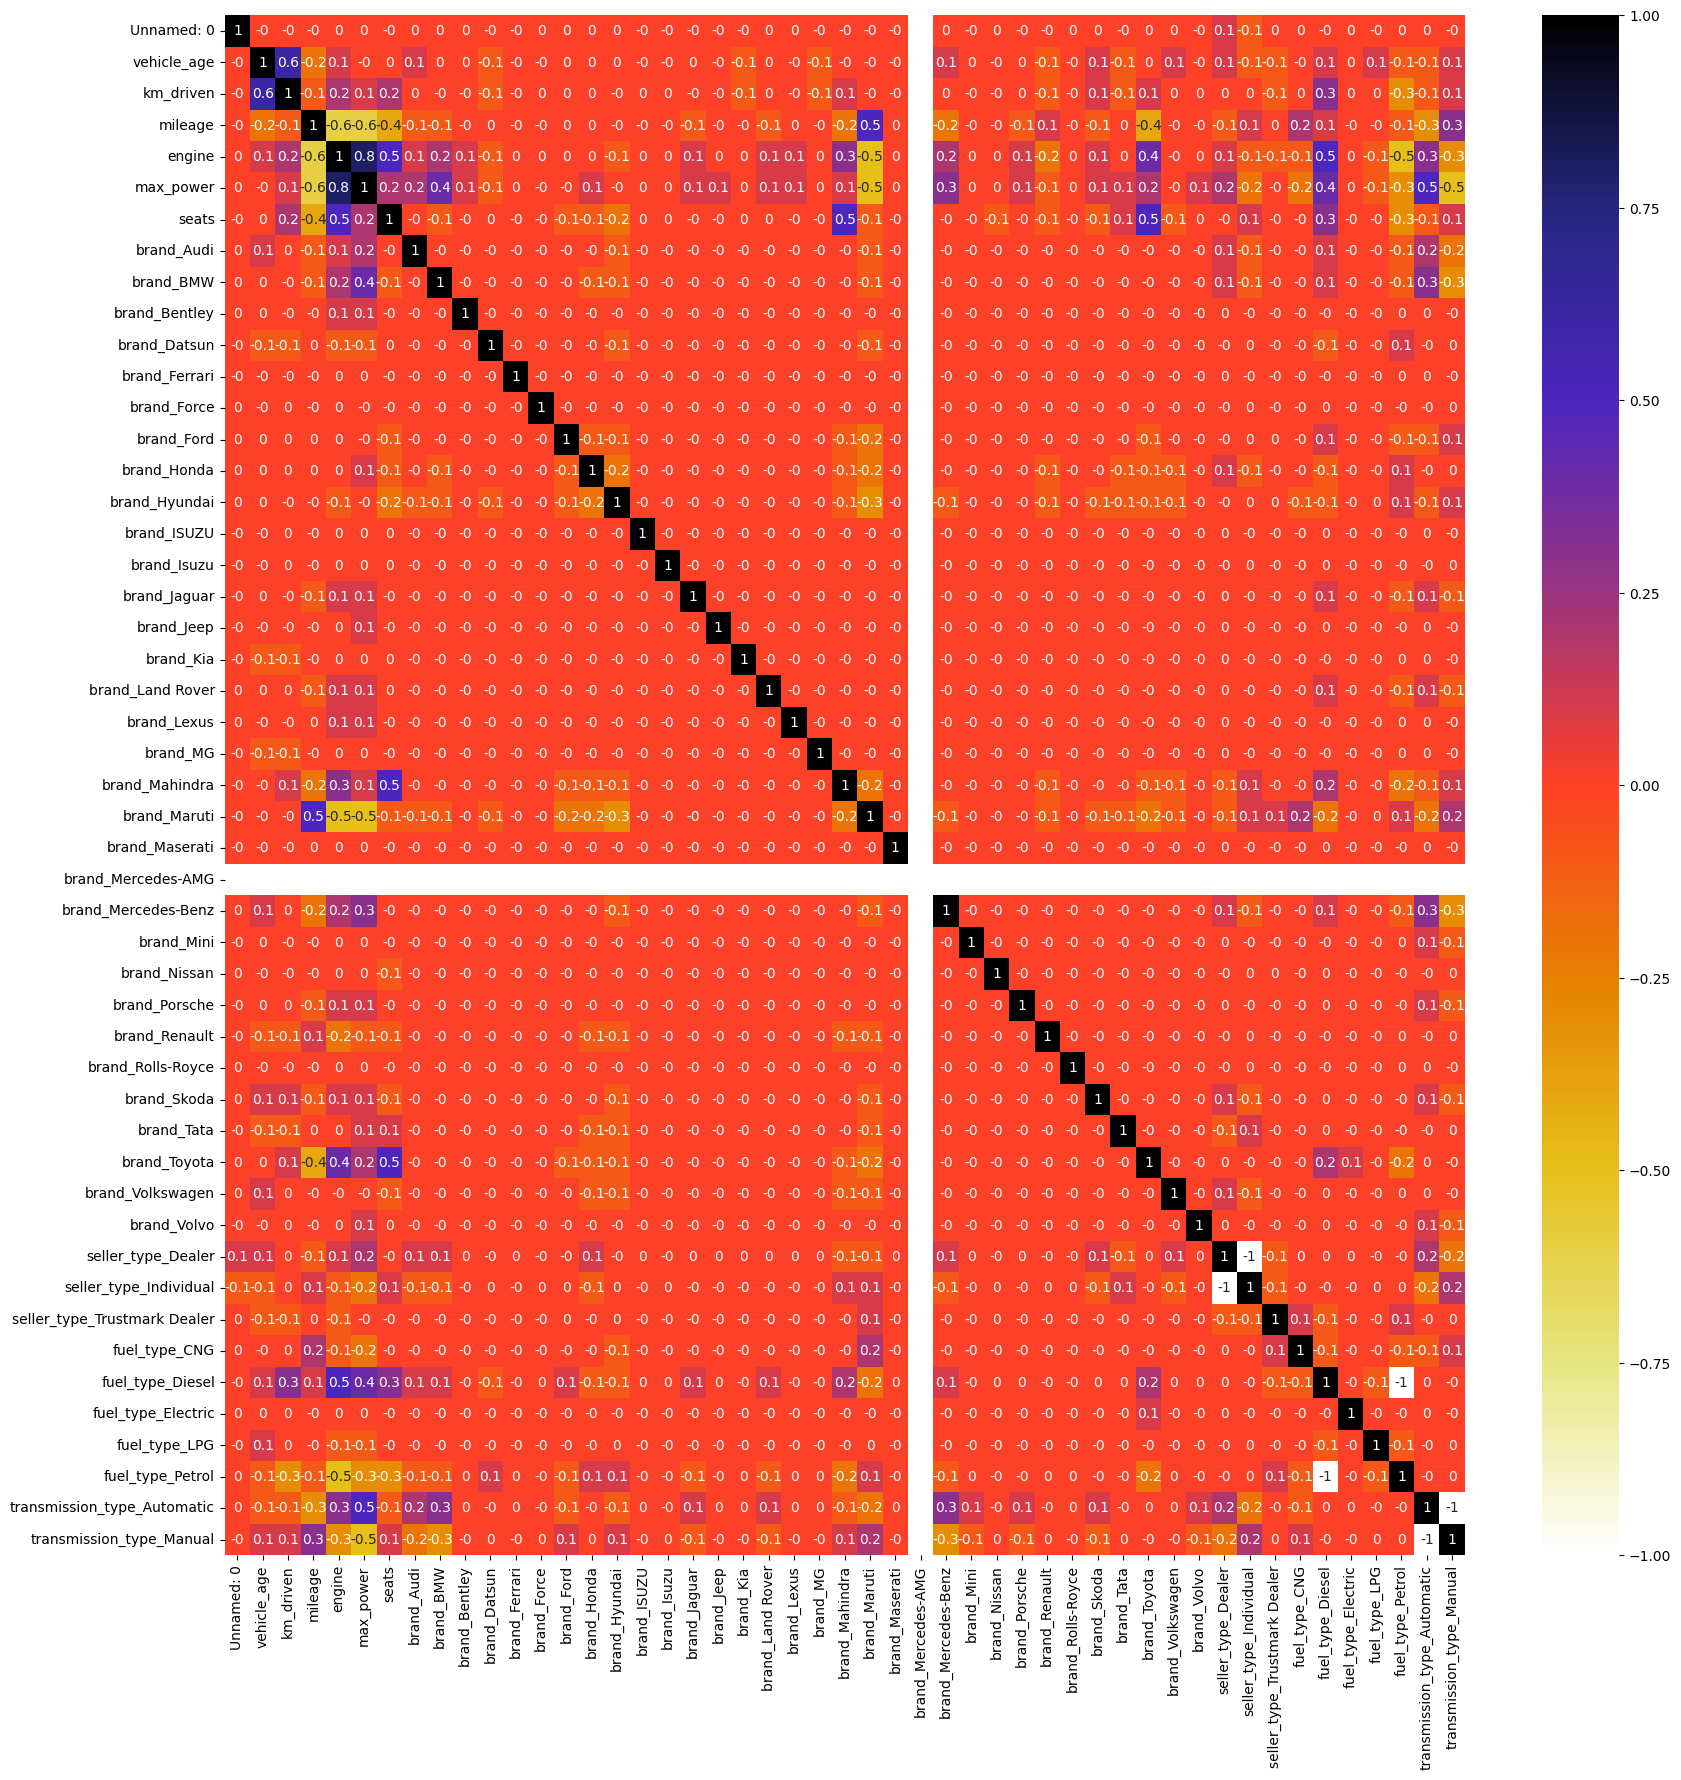

In [ ]:
corr_matrix = round(corr_matrix,1)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r,annot=True)    # Heat map using saborn
plt.show()

#### 4.7 Provide detailed observations and conclusions.

**Independent features with highest correlation greater than 0.4 to target variable is(Highest to lowest)**
*   max_power
*   engine
*   transmission_type
*   vehicle_age

These features will therefore have the greatest effect onthe target variabele.



### Section 5: Feature Selection

#### 5.1 Use correlation result for feature selection.

In [ ]:
def correlation(dataset, threshold):             # To find the correlated features using this method.
    corr_pairs = tuple()
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                all_pairs.append(corr_pairs)
    return all_pairs

In [ ]:
corr_feature_pairs = correlation(X_train, 0.7)  # B) To find which independent features have maximum correlation calling the above correlation function
corr_feature_pairs

0.8403031368724398
0.976967574206082
0.9544829865632258
1.0000000000000004


[('max_power', 'engine', np.float64(0.8403031368724398)),
 ('seller_type_Individual',
  'seller_type_Dealer',
  np.float64(-0.976967574206082)),
 ('fuel_type_Petrol', 'fuel_type_Diesel', np.float64(-0.9544829865632258)),
 ('transmission_type_Manual',
  'transmission_type_Automatic',
  np.float64(-1.0000000000000004))]

#### 5.2 Select the features according to the K highest score.

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import mutual_info_regression

In [ ]:
sel_cols = SelectKBest(f_regression, k=10)  # Creating instance of SelectKBest class

sel_cols.fit(X_train, y_train)   # Applies feature selection tool (above) to training data.

SelectKBest(score_func=<function f_regression at 0x7e2d1ca25760>)

In [ ]:
sel_cols = SelectPercentile(f_regression, percentile=20)   # Class selectkbest used to select top scoring features based on percentile (keeps only 20% of featureswith highest scores)

sel_cols.fit(X_train, y_train)                             # Fit() used to train feature seldctor on the training data.

SelectPercentile(percentile=20,
                 score_func=<function f_regression at 0x7e2d1ca25760>)

In [ ]:
print(X_train.columns[sel_cols.get_support()])   # Actual selected important features with highest K score.

sel_cols.get_support()      # Boolean values of X_train columns - True when important feature, and false not not selected feature.

Index(['vehicle_age', 'mileage', 'engine', 'max_power', 'brand_BMW',
       'brand_Maruti', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual'],
      dtype='object')


array([False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True])

#### 5.3 Provide detailed insights about the selected features.




*   Correlation matrix showed that the following features had the greatest correlation with the target variable:
1.   max_power
2.   engine
3. transmission_type
4. vehicle_age

These would have h=the greatest impact on selling price compared to other features.

   

*   Correlation for correlation amongst independent variables showed that h=the following features had high correlation wish each other:


1.   max_power
2.   engine

These features correlate highly with each other and one should be dropped for a model to remove redundancy.



*   Features with highest K score basedon f_regression are:


1.   mileage
2.   max_power

These features were chosen based on there K score meaning they have a strong linear relationship with target variable.















**RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [101]:
model= RandomForestRegressor(n_estimators=150, max_depth=12, min_samples_split=2, min_samples_leaf=2, random_state=42)

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [102]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=150,
                      random_state=42)

In [103]:
y_pred = model.predict(X_test)
y_pred

array([2.55629497, 2.37556114, 2.40555644, ..., 2.44874578, 2.39775129,
       2.37770595])

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [104]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.007181684007895794


In [105]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.009556764763598579


In [106]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.9389182539816392


In [107]:
import pickle
with open('RFR.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)